# ML Lab 5-  Support Vector Machines (SVM)

Objectives: Implement Support Vector Machines (SVM) algorithm for linearly and nonlinearly separable datasets. 

SVM with Gaussian kernels. 

Cross validation to select the best SVM parameters. 

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat

### PART 1 - Linearly separable Data (linear SVM)

File *ex6data1.mat* consists of 2D linearly separable dataset (i.e. with linear boundary between the two classes).

Use loadmat to load the training data as a dictionary with keys X and y. Extract arrays X and y. Consult the same code from Lab 4.  

In [7]:
# mat is a dict with key "X" for x-values, and key "y" for y values
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]
print(X)
print(y)
#print(X.shape)
#print(y.shape)

[[1.9643   4.5957  ]
 [2.2753   3.8589  ]
 [2.9781   4.5651  ]
 [2.932    3.5519  ]
 [3.5772   2.856   ]
 [4.015    3.1937  ]
 [3.3814   3.4291  ]
 [3.9113   4.1761  ]
 [2.7822   4.0431  ]
 [2.5518   4.6162  ]
 [3.3698   3.9101  ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.2638   4.3706  ]
 [2.6555   3.5008  ]
 [3.1855   4.2888  ]
 [3.6579   3.8692  ]
 [3.9113   3.4291  ]
 [3.6002   3.1221  ]
 [3.0357   3.3165  ]
 [1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [1.9527   2.7843  ]
 [2.2753   2.7127  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [3.0473   2.2931  ]
 [2.4827   2.0373  ]
 [2.5057   2.3853  ]
 [1.8721   2.0577  ]
 [2.0103   2.3546  ]
 [1.2269   2.3239  ]
 [1.8951   2.9174  ]
 [1.561    3.0709  ]
 [1.5495   2.6923  ]
 [1.6878   2.4057  ]
 [1.4919   2.0271  ]
 [0.962    2.682   ]
 [1.1693   2.9276  ]
 [0.8122   2.9992  ]
 [0.9735   3.3881  ]
 [1.25     3.1937  ]
 [1.3191   3.5109  ]
 [2.2292   2.201   ]
 [2.4482   2.6411  ]
 [2.7938   1.9656  ]
 [2.091    1.6177  ]
 [2.5403   2.

### Plotting the data

Plot the data to get Fig.1. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1; 4.1). You will see how this outlier affects the SVM decision boundary.

<img src="images2/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1 ** : **Dataset 1 (ex6data1.mat)** </center></caption>

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True]
(51, 2)


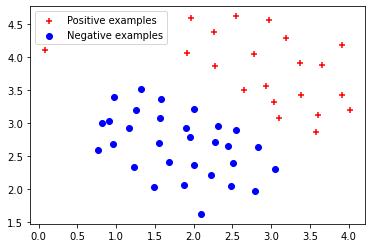

In [4]:
# Create Fig.1. Use similar code in Lab 3.  
pos=(y==1)
neg=(y==0)
print(pos[:,0])
print(X.shape)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
plt.legend(["Positive examples","Negative examples"])


### SVM training

Scikit-learn (sklearn) is a free machine learning library for Python. It features various algorithms like support vector machine, random forests k-neighbours. It also supports Python numerical and scientific libraries like NumPy and SciPy.

From sklearn.svm import function SVC to train SVM classifier.
Choose linear kernel and train with different values of parameter C (for example C=1, C=100). 

C parameter is a positive value that controls the penalty for misclassified training examples. A large C tells the SVM to try to classify all examples correctly. C plays a role similar to $1/\lambda$ where $\lambda$ is the regularization parameter used for Logistic Regression. 

When C = 1, you should find that SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left. 

When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural data fit. 


In [5]:
from sklearn.svm import SVC
#SVC? to get on-line help

# Test C = 1

classifier = SVC(C=1, kernel="linear")
#np.ravel(y) returns a flattened 1-D array. It is suggested by python instead of classifier.fit(X,y)
#print(y.shape)  => (51,1) - 2d array
#print(np.ravel(y).shape) => (51,) 1d array 
print(X.shape)
classifier.fit(X,np.ravel(y))
print(classifier.score(X,y))  #ANSWER arround 98% accuracy

(51, 2)
0.9803921568627451


### Visualising the Training set results

(100, 100)
(100, 100)
(10000,)


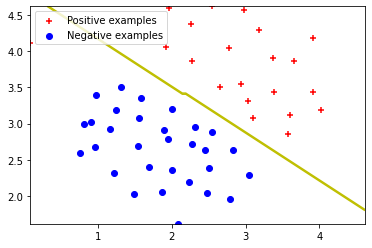

In [12]:
#plt.figure(figsize=(6,4))
#plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
#plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
plt.legend(["Positive examples","Negative examples"])

# plotting the decision boundary
num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")

#X_1, X_2 are num x num matrices 
#X_1.ravel() #is (num*num,) 1d array
#np.array([X_1.ravel(),X_2.ravel()]) #is (2,num*num) array
#classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T) #=> (num*num,) 1d binary array (0 or 1) 
#plt.contour(X_1 ( num x num) ,X_2 ( num x num), Z(num x num), levels)
#plt.xlim(-1,5)
#plt.ylim(-1,5)

print(X_1.shape)
print(X_2.shape)
print(X_1.ravel().shape)  #is (num*num,) 1d array

In [6]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))
print(classifier2.score(X,y)) #ANSWER arround 100% accuracy

1.0


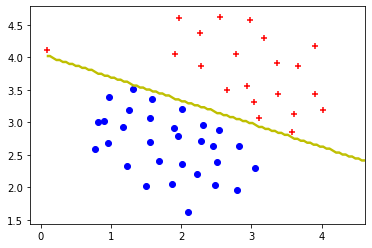

In [7]:
#plt.figure(figsize=(6,4))
#plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
#plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
#plt.legend(["Positive examples","Negative examples"])

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="y")
#plt.xlim(0,4.5)
#plt.ylim(1.5,5)

### PART 2 - Nonlinearly separable data  (SVM with Gaussian Kernels)

Load data from file ex6data2.mat and get arrays X and y. 

In [7]:
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

### Plotting the data

Plot the data to get Fig.2. From the figure, you can observe that there is nonlinear decision boundary that separates the + and - examples for this dataset. By using SVM with Gaussian kernel, you will be able to learn a nonlinear decision boundary that fits better this data set.

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2 ** : **Dataset 2 (ex6data2.mat)** </center></caption>

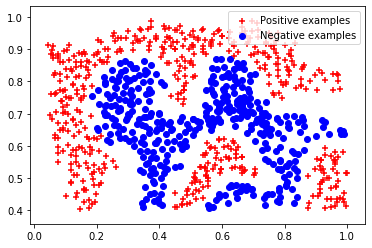

In [8]:
pos=(y2==1)
neg=(y2==0)
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+")
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="b",marker="o")
plt.legend(["Positive examples","Negative examples"])

### Gaussian SVM training

Choose *rbf* (Radial Basis Function) kernel, which corresponds to Gaussian kernel. 

**gamma** parameter is the inverse of the standard deviation of the RBF kernel (gamma = $1/\sigma$). 
**gamma** is used as a similarity measure between two points. 

Small gamma value defines a Gaussian function with a large variance => two points are considered similar even if they are relatively far away from each other. 

Large gamma value defines a Gaussian function with a small variance => two points are considered similar if they are very close to each other.

In [9]:
#call SVC with rbf kernel and gamma =30 and get a score of arround 97% accuracy
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())
print(classifier3.score(X2,y2)) 
 

0.9721900347624566


### Plot the data and the decision boundary

Observe that the decision boundary is able to separate most of the positive and negative examples correctly. 

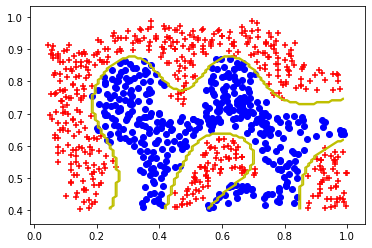

In [10]:
pos=(y2==1)
neg=(y2==0)
plt.scatter(X2[pos[:,0],0],X2[pos[:,0],1],c="r",marker="+")
plt.scatter(X2[neg[:,0],0],X2[neg[:,0],1],c="b",marker="o")
#plt.legend(["Positive examples","Negative examples"])

# plotting the decision boundary
num=100
X_1,X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num),np.linspace(X2[:,1].min(),X2[:,1].max(),num))
plt.contour(X_1,X_2,classifier3.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")


### PART 3  - Nonlinear SVM with Gaussian Kernels, optimization of C and  $\sigma$ (Dataset 3)

File *ex6data3.mat* contains training data (X,y) and validation data (Xval, yval). 
Load them and plot the training data to get Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig.3 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [14]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

#print(mat3)

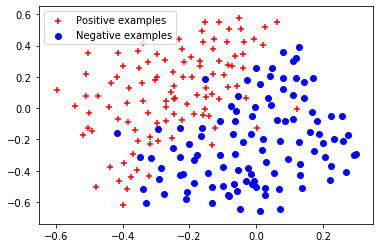

In [15]:
pos=(y3==1)
neg=(y3==0)
plt.scatter(X3[pos[:,0],0],X3[pos[:,0],1],c="r",marker="+")
plt.scatter(X3[neg[:,0],0],X3[neg[:,0],1],c="b",marker="o")
plt.legend(["Positive examples","Negative examples"])

### Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters. You should complete the code in *dataset3Params*, to search over the parameters C and $\sigma$. 

For both C and $\sigma$, it is suggested to try the following values (0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). 

Function *dataset3Params* tries all possible pairs of values for C and  $\sigma$. For example, for the 8 values listed above, a total of 8\^2 = 64 different models will be trained and evaluated (on the validation set). For the best parameters, the SVM should return a decision boundary similar to Fig. 4.

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> **Fig.4 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [16]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [25]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
best_C, best_gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)

classifier4 = SVC(C=best_C,gamma=best_gamma)
classifier4.fit(X3,y3.ravel())

print(classifier4.score(X3,y3)) # 95% training set accuracy

print(classifier4.score(Xval,yval)) # 96.5 % validation set accuracy 

print(Xval.shape)
print(X3.shape)

print('Best C:', best_C)
print('Best sigma:', 1/best_gamma)

0.95260663507109
0.965
(200, 2)
(211, 2)
Best C: 0.3
Best sigma: 0.01


### Plotting the decision boundary

(-0.7, 0.5)

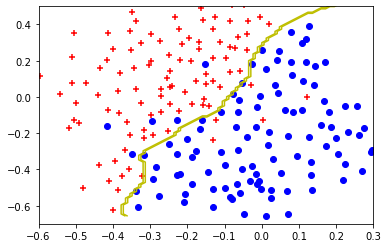

In [18]:
pos=(y3==1)
neg=(y3==0)
plt.scatter(X3[pos[:,0],0],X3[pos[:,0],1],c="r",marker="+")
plt.scatter(X3[neg[:,0],0],X3[neg[:,0],1],c="b",marker="o")
#plt.legend(["Positive examples","Negative examples"])

# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="y")

plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

In [21]:
SVC?

In [24]:
SVC.score?

In [20]:
print(yval.shape)

print(y.shape)

(200, 1)
(51, 1)
